# 이진 트리의 두 노드간 가장 긴 경로의 길이를 출력하라.

```python
        1
       /  \
    2       3
    /\
   4  5

```

- 이진트리가 주어졌을 때, 가장 긴 경로는 4->2->1->3 또는 5->2->1->3 으로 3이다.

# 상태값 누적 트리 DFS

- 가장 긴 경로를 찾는 방법은 먼저 가장 말단, 즉 리프노드까지 탐색한 다음 부모로 거슬러 올라가면서 각각의 거리를 계산해 상태값을 업데이트하면서 다음과 같이 누적해 올라가면 될 것 같다.

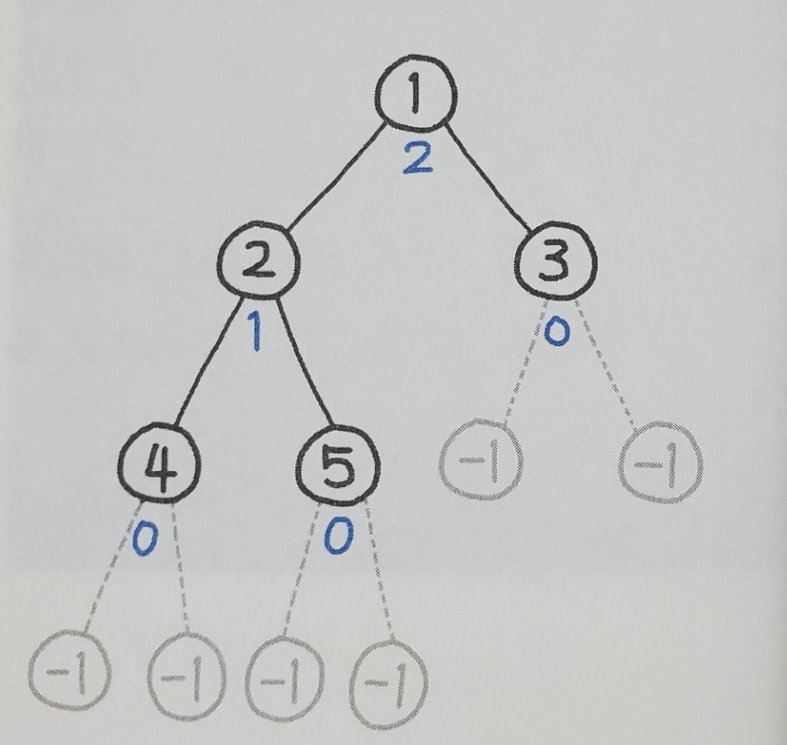

- 그림에서는 존재하지 않는 노드에도 -1 이라는 값을 부여한다. 

- 나중에 보면 알겠지만 정이진트리가 아닌 대부분의 경우에는 존재하지 않는 자식 노드에 -1 을 부여해 페널티를 주기 위함이다.

- 이렇게 거슬러 올라가 최종루트에서 상태값은 2, 거리는 3이 된다. 정답은 거리인 3이다.

- __상태값은 리프노드에서 현재 노드까지의 거리다.__

- 다시 정리하면 최종적으로 거리는 왼쪽 자식 노드의 리프노드에서 현재 노드까지의 거리(상태값)와 오른쪽 자식 노드의 리프노드에서 현재 노드까지의 거리(상태값)의 합에 2(현재 노드와 왼쪽, 오른쪽 자식 노드와의 거리)를 더한 값과 같다.

In [ ]:
# 탐색함수

def dfs(node:TreeNode)->int:
    ...
    left = dfs(node.left)
    right = dfs(node.right)

- 이처럼 계속 재귀호출을 통해 왼쪽, 오른쪽의 각 리프노드까지 DFS로 탐색한다.

In [ ]:
def dfs(node:TreeNode)->int:
    ...
    longest = max(longest, left + right + 2)
    return max(left, right) + 1

- 이후에는 2개의 값을 계산하는데, 하나는 최종 결과가 될 가장 긴 경로 longest, 나머지 하나는 앞서 애기한 상태값 max(left, right) + 1 을 말한다. 편의상  a,b로 치환해 표현 해보면 다음과 같다.

```python
a = left + right + 2 # 거리
b = max(left, right) + 1 # 상태값
```

- 자식노드가 하나도 없는 경우 left, right 는 모두 -1 이고 이 경우 거리는 0, 상태값도 0이 된다.

- 자식 노드가 모두 존재하는 경우에는, 그리고 자식 노드가 둘 다 상태값이 0이라면 거리인 a 는 2 상태값인 b는 1이 된다.

In [8]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def build_tree(nodes, index):
    node = None
    if index < len(nodes) and nodes[index] is not None:
        node = TreeNode(nodes[index])
        node.left = build_tree(nodes, 2 * index + 1)
        node.right = build_tree(nodes, 2 * index + 2)
    return node


class Solution:
    longest = 0

    def diameterOfBinaryTree(self, root: TreeNode) -> int:
        def dfs(node: TreeNode) -> int:
            if not node:
                return -1
            # 왼쪽, 오른쪽의 각 리프노드까지 탐색
            left = dfs(node.left)
            right = dfs(node.right)

            # 가장 긴 경로
            self.longest = max(self.longest, left + right + 2)
            # 상태값
            return max(left, right) + 1

        dfs(root)
        return self.longest


# 이진 트리 생성
data = [1, 2, 3, 4, 5]
root_node = build_tree(data, 0)

# Solution 객체 생성
solution = Solution()
result = solution.diameterOfBinaryTree(root_node)
print(result)


3


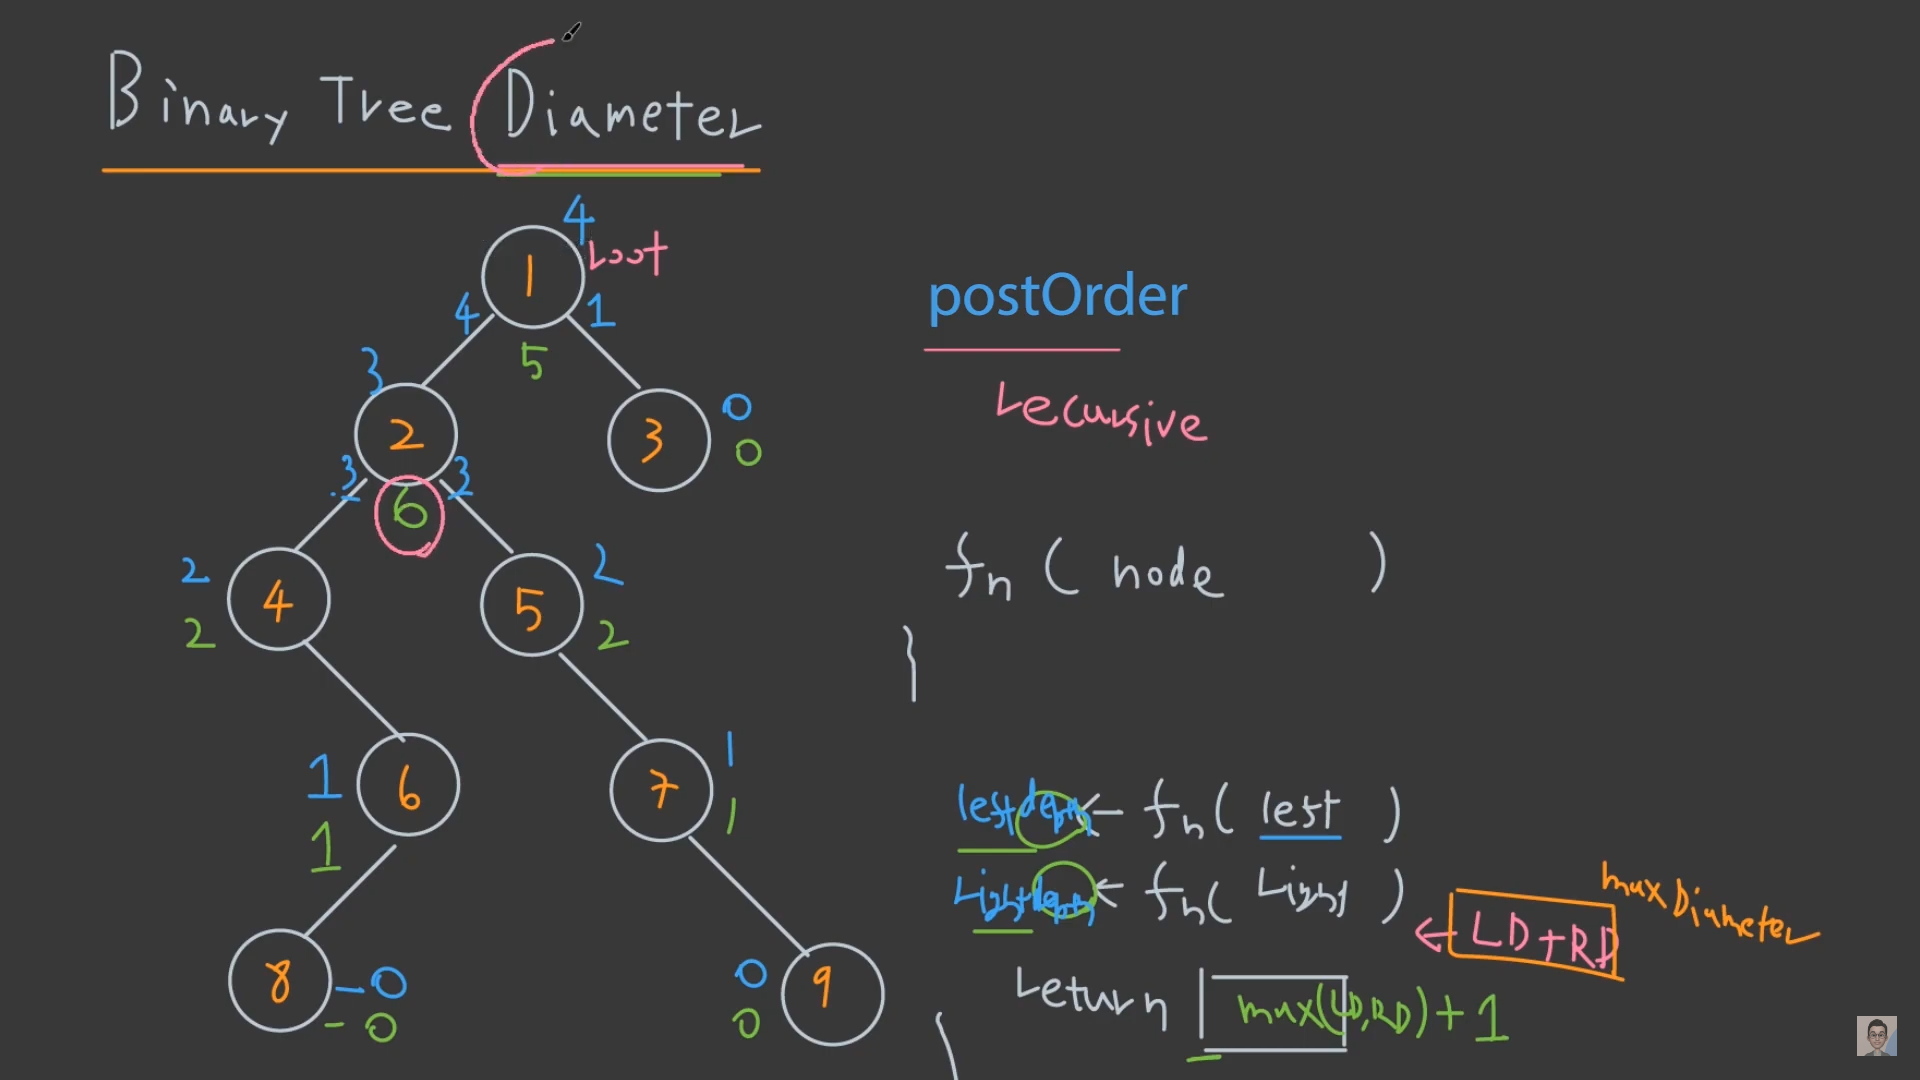

In [11]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def build_tree(nodes, index):
    node = None
    if index < len(nodes) and nodes[index] is not None:
        node = TreeNode(nodes[index])
        node.left = build_tree(nodes, 2 * index + 1)
        node.right = build_tree(nodes, 2 * index + 2)
    return node


class Solution:
    longest = 0

    def diameterOfBinaryTree(self, root: TreeNode) -> int:
        def dfs(node: TreeNode) -> int:
            if not node:
                return 0
            # 왼쪽, 오른쪽의 각 리프노드까지 탐색
            left = dfs(node.left)
            right = dfs(node.right)

            # 가장 긴 경로
            self.longest = max(self.longest, left + right)
            # 상태값
            return max(left, right) + 1

        dfs(root)
        return self.longest


# 이진 트리 생성
data = [1, 2, 3, 4, 5]
root_node = build_tree(data, 0)

# Solution 객체 생성
solution = Solution()
result = solution.diameterOfBinaryTree(root_node)
print(result)


3
